<a href="https://colab.research.google.com/github/HadiRezaei1991/assignment/blob/main/Modelling_and_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load pre-trained model for object detection
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Function to perform object detection
def detect_objects(image):
    height, width, channels = image.shape
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    detected_objects = []
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            detected_objects.append((label, x, y, w, h))
    return detected_objects

# Load the image from your hard drive
image_path = "/content/image (4).jpg"
image = cv2.imread(image_path)

# Check if image is loaded successfully
if image is None:
    print("Error: Unable to load the image at", image_path)
else:
    print("Image loaded successfully.")

    # Detect objects in the image
    detected_objects = detect_objects(image)

    # Display the image with detected objects
    for obj in detected_objects:
        label, x, y, w, h = obj
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2_imshow(image)

Error: Unable to load the image at /content/image (4).jpg


Image loaded successfully.


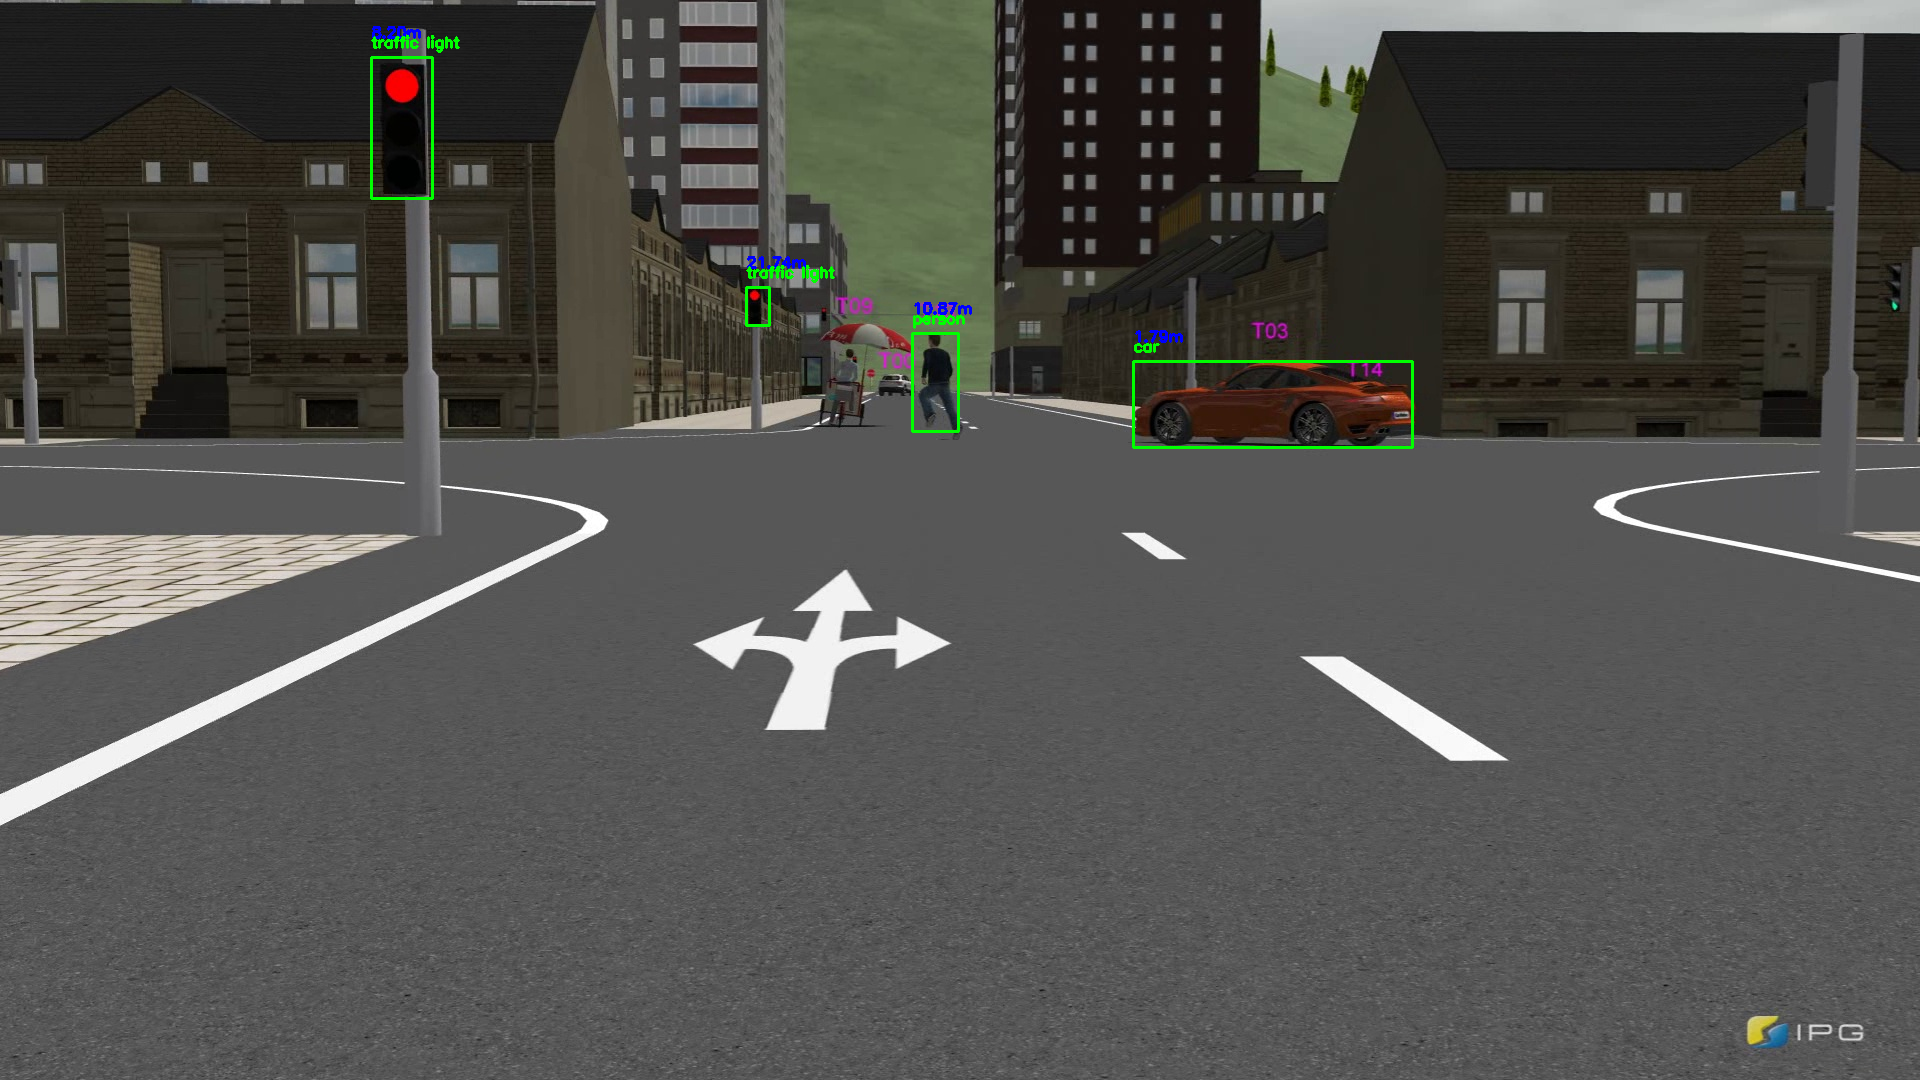

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load pre-trained model for object detection
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Function to perform object detection
def detect_objects(image):
    height, width, channels = image.shape
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    detected_objects = []
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            detected_objects.append((label, x, y, w, h))
    return detected_objects

# Function to estimate distance
def estimate_distance(focal_length, known_width, pixel_width):
    return (known_width * focal_length) / pixel_width

# Load the image from your hard drive
image_path = "/content/test1_frame35.jpg"
image = cv2.imread(image_path)

# Check if image is loaded successfully
if image is None:
    print("Error: Unable to load the image at", image_path)
else:
    print("Image loaded successfully.")

    # Detect objects in the image
    detected_objects = detect_objects(image)

    # Assuming known_width of a pedestrian is 0.5 meters and focal_length is 1000 pixels
    known_width = 0.5  # in meters
    focal_length = 1000  # in pixels

    # Estimate distance for each detected object and draw bounding box with label and distance
    for obj in detected_objects:
        label, x, y, w, h = obj
        pixel_width = w
        distance = estimate_distance(focal_length, known_width, pixel_width)
        distance_text = f"{distance:.2f}m"
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, distance_text, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2_imshow(image)

In [1]:
import cv2
import numpy as np
import subprocess

# Function to convert WMV to MP4 using ffmpeg
def convert_wmv_to_mp4(input_path, output_path):
    command = ['ffmpeg', '-i', input_path, '-c:v', 'libx264', '-crf', '23', '-c:a', 'aac', '-strict', 'experimental', '-y', output_path]
    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Load pre-trained model for object detection
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Function to perform object detection
def detect_objects(image):
    height, width, channels = image.shape
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    detected_objects = []
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            detected_objects.append((label, x, y, w, h))
    return detected_objects

# Function to estimate distance
def estimate_distance(focal_length, known_width, pixel_width):
    return (known_width * focal_length) / pixel_width

# Convert WMV to MP4
input_video_path = "/content/001_Noon30m.mp4"
output_video_path = "converted_video.mp4"
convert_wmv_to_mp4(input_video_path, output_video_path)

# Load the converted video
cap = cv2.VideoCapture(output_video_path)

# Check if video is loaded successfully
if not cap.isOpened():
    print("Error: Unable to load the video at", output_video_path)
else:
    # Create a VideoWriter object to save the modified video
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter("output_video.mp4", fourcc, fps, (width, height))

    # Process the video frame by frame
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1
        # Limit processing to the first 30 seconds (900 frames at 30 fps)
        if frame_count > 3000:
            break

        # Detect objects in the frame
        detected_objects = detect_objects(frame)

        # Assuming known_width of a pedestrian is 0.5 meters and focal_length is 1000 pixels
        known_width = 0.5  # in meters
        focal_length = 1000  # in pixels

        # Estimate distance for each detected object and draw bounding box with label and distance
        for obj in detected_objects:
            label, x, y, w, h = obj
            pixel_width = w
            distance = estimate_distance(focal_length, known_width, pixel_width)
            distance_text = f"{distance:.2f}m"
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, distance_text, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Write the modified frame to the output video
        out.write(frame)

    # Release video objects
    cap.release()
    out.release()

    print("Video processing completed. Output saved at output_video.mp4")


Video processing completed. Output saved at output_video.mp4


# New Section